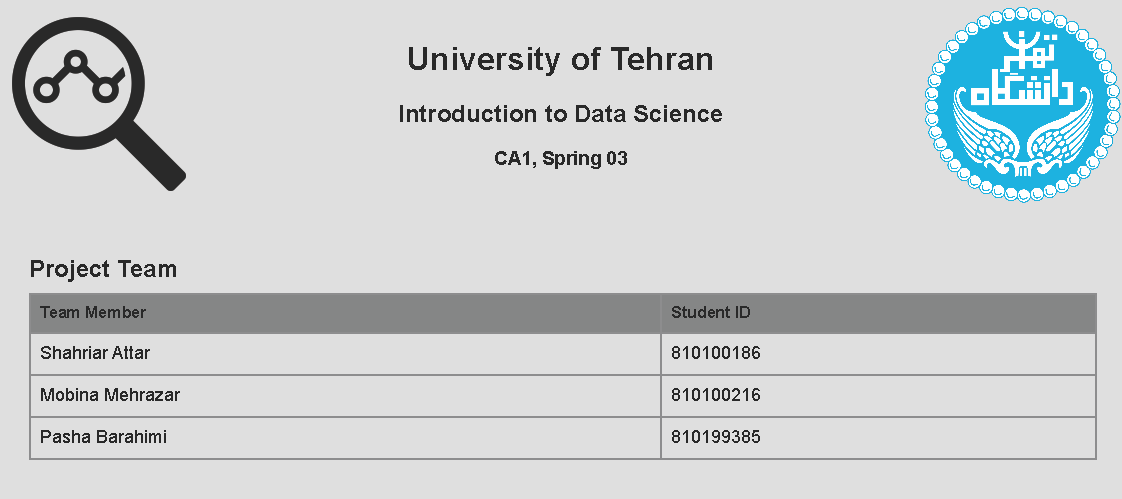


# Statistical Analysis Tools

## Table of Contents

-   [Statistical Analysis Tools](#statistical-analysis-tools)
    -   [Introduction](#introduction)
    -   [Objectives](#objectives)
    -   [Tasks](#tasks)
    -   [Environment Setup](environment-setup)
    -   [Monte Carlo Simulation](#monte-carlo-simulation)
        -   [Pi Calculation](#pi-calculation)
        -   [Mensch Game](#mensch-game)
    -   [Central Limit Theorem (CLT)](#central-limit-theorem)
    -   [Hypothesis Testing](#hypothesis-testing)
        -   [Unfair Coin](#unfair-coin)
        -   [T-Test](#t-test)
    -   [Questions](#questions)
    -   [Resources](#resources)

## Introduction

In this assignment, we are going to get acquainted with and implement some tools for statistical analysis. These tools could come to out help in our future research and projects.

## Objectives

The purpose of this assignment is as follows:

1. Using `Monte Carlo Simulation` to model and analyze complex systems.
2. Using `Central Limit Theorem (CLT)` for making inferences about population parameters based on sample statistics.
3. Using `Hypothesis Testing` to make informed decisions and come to a conclusion about population parameters based on sample data.

## Tasks

1. **Monte Carlo Simulation**: Implementing `Monte Carlo Simulation` for the systems where analytical or closed-form solutions are difficult.
2. **Central Limit Theorem (CLT)**: Experiencing a hands-on opportunity to observe and understand the `Central Limit Theorem` in action.
3. **Hypothesis Testing**: Understanding how `Hypothesis Testing` can help us to analyze data and make a decision based on them in different situations.


## Environment Setup

Let's begin with setting up the Python environment and installing necessary libraries.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats._distn_infrastructure import rv_continuous_frozen, rv_discrete_frozen
import re

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns

from IPython.display import display, HTML
from colorama import Fore, Style

In [17]:
# ---------- Monte Carlo Simulation Constants ----------
NUM_POINTS_LIST = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]


# ------------ CLT Constants ------------

CLT_DISTRIBUTION_SIZE = 10000
CLT_LARGE_SAMPLE_COUNT = 1000
CLT_SAMPLE_SIZES = [5, 20, 200, 500]

# ------------ Hypothesis Testing Constants ------------
COIN_SAMPLE_SIZES = [30, 100, 1000, 10000]
UNFAIR_COIN_BIAS = [.55, .6, .7]
FAIR_COIN_MEAN = .5
CONFIDENCE_LEVEL = .95
ALPHA = .05
JOB_PLACEMENT_CSV = "../data/job_placement.csv"

## Monte Carlo Simulation

In this section, we will learn more about Monte Carlo Simulation and understand how it can help us to model and analyze complex systems, where analytical or closed-form solutions are difficult.  
Monte Carlo simulation is a computational technique to approximate the behavior or output of a complex system or problem by repeated random sampling. This method relies on the Probability Theory concept of the Law of Large Numbers which states that if an experiment is repeated a large number of times then its average results will converge towards the expected value.

-   Steps to perform Monte Carlo Simulation:
    1. Define the domain of possible inputs.
    2. Generate inputs randomly from a probability distribution over the domain.
    3. Perform a deterministic computation on the inputs.
    4. Aggregate the results.
-   Advantages of Monte Carlo Simulation:

    -   It can handle complex systems with multiple variables.
    -   It can model systems with a large number of variables.
    -   It can model systems with a large number of interactions between variables.
    -   It can model systems with a large number of random variables.
    -   It can model systems with a large number of possible outcomes.
    -   It can model systems with a large number of possible states.

-   Limitations of Monte Carlo Simulation:
    -   It can be computationally expensive.
    -   It can be time-consuming.
    -   It can be memory-intensive.
    -   It can be difficult to implement.
    -   It can be difficult to validate.
    -   It can be difficult to interpret.
    -   It can be difficult to communicate.


### Pi Calculation

First, we are going to estimate the value of Pi using Monte Carlo simulation. The idea is to randomly generate points within a square and determine how many fall in a circle inscribed by the square. By comparing the points inside the circle to the total number of points we can approximate the Pi number. Also, we'll repeat our simulation with a different number of points and analyze their results.


In [18]:
def estimate_pi(num_points):
    np.random.seed(42)
    points = np.random.rand(num_points, 2)
    inside_circle = np.sum(np.linalg.norm(points, axis=1) <= 1)
    return 4 * inside_circle / num_points

def plot_pi_values(num_points_list):
    pi_values = [estimate_pi(num_points) for num_points in num_points_list]

    plt.plot(num_points_list, pi_values, marker='o', label="Approximated π")
    plt.axhline(y=np.pi, color='r', linestyle='--', label="π")
    plt.xlabel("Number of Points")
    plt.ylabel("Approximated π")
    plt.title("Approximation of π using Monte Carlo method")
    plt.grid(True)
    plt.legend()
    plt.show()

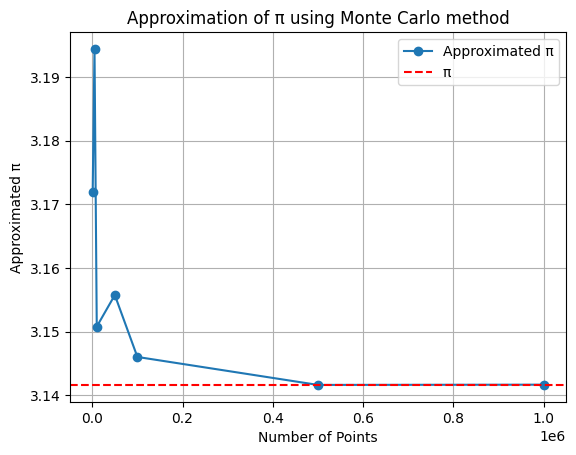

In [19]:
plot_pi_values(NUM_POINTS_LIST)

### Mensch Game

Mensch is a very old German game, which is also popular in our country. You can learn more about Mensch and its rules in [this link](https://en.wikipedia.org/wiki/Mensch_ärgere_Dich_nicht).

We are going to analyze the simpler version of this game in which every player only has one piece in the game. So basically, every player only rolls dice in his turns and moves his piece. So, everything is purely based on chance. We want to calculate the probability of winning for each of the 1st, 2nd, 3rd, and 4th players in this game. Let's perform the Monte Carlo Simulation over the specified game to calculate these probabilities.


In [8]:
# Your code goes here

## Central Limit Theorem

The objective of this section is to provide us with a hands-on opportunity to observe and understand the Central Limit Theorem in action. The CLT is a fundamental result that supports many statistical techniques and methods. It provides a theoretical basis for making inferences about population parameters based on sample statistics.

First of all, we'll select three different probability distributions. These distributions will serve as the population distributions from which we will take out samples.


In [5]:
normal_dist = np.random.normal(0, 1, CLT_DISTRIBUTION_SIZE)
uniform_dist = np.random.uniform(0, 1, CLT_DISTRIBUTION_SIZE)
exponential_dist = np.random.exponential(1, CLT_DISTRIBUTION_SIZE)

dists = {
    "Normal Distribution": normal_dist,
    "Uniform Distribution": uniform_dist,
    "Exponential Distribution": exponential_dist,
}

In [7]:
def print_std_mean(data: dict[str, np.ndarray]):
    length = max(len(name) for name in data.keys()) + 2
    for name, data in data.items():
        print(f"{name: <{length}} -> Mean: {np.mean(data):.8f}, Std: {np.std(data):.8f}")

In [8]:
print_std_mean(dists)

Normal Distribution        -> Mean: -0.00230652, Std: 1.00678788
Uniform Distribution       -> Mean: 0.49620252, Std: 0.28887422
Exponential Distribution   -> Mean: 0.99338978, Std: 0.99017091


Now for each of the distributions, we will perform the following steps for different sample sizes (in increasing order):


1. Generate a large number of random samples with a specific sample size from the chosen distribution.


In [9]:
def generate_sample(data: np.ndarray, sample_size: None) -> np.ndarray:
    return np.random.choice(data, sample_size)

2. Calculate the mean of each sample.


In [10]:
def get_samples_means(samples: np.ndarray) -> np.ndarray:
    return np.mean(samples, axis=1)

3. Plot the histogram of the sample means and overlay it with the expected normal distribution based on the Central Limit Theorem.


The sampling distribution of the sample means will be approximately normally distributed, regardless of the shape of the original population distribution. This distribution can be calculated using the following formula:

$$Sampling\ Distribution \sim N(\mu, \frac{\sigma}{\sqrt{n}})$$

Where:

-   $\mu$ is the mean of the population.
-   $\sigma$ is the standard deviation of the population.
-   $n$ is the sample size.
-   $N$ is the normal distribution.


In [11]:
def get_sampling_distribution(data: np.ndarray, sample_size: int):
    mu, sigma = np.mean(data), np.std(data) / np.sqrt(sample_size)
    return stats.norm(mu, sigma)

In [12]:
def plot_distribution(ax: Axes, data: np.ndarray, title: str, sampling_dist: rv_continuous_frozen):
    sns.histplot(data, kde=True, stat="density", ax=ax)
    ax.set_title(title)

    x = np.linspace(data.min(), data.max(), 100)
    y = sampling_dist.pdf(x)
    ax.plot(x, y, "r-", label="Sampling Distribution")

    ax.legend()

In [108]:
def run_clt(data: dict[str, np.ndarray], sample_sizes: list[int]) -> dict[str, dict[str, np.ndarray]]:
    fig, axs = plt.subplots(len(sample_sizes), len(data), figsize=(20, 20))
    dists_with_samples = {"Population": dists}
    
    for i, sample_size in enumerate(sample_sizes):
        dist_means = dict()
        for j, (name, dist) in enumerate(data.items()):
            sample = generate_sample(dist, (CLT_LARGE_SAMPLE_COUNT, sample_size))
            mean = get_samples_means(sample)
            title = f"{name} (sample size: {sample_size})"
            dist_means[title] = mean

            sampling_dist = get_sampling_distribution(dist, sample_size)
            plot_distribution(axs[i, j], mean, title, sampling_dist)
            
        dists_with_samples[f"Sample Size: {sample_size}"] = dist_means
        
    plt.show()
    
    return dists_with_samples

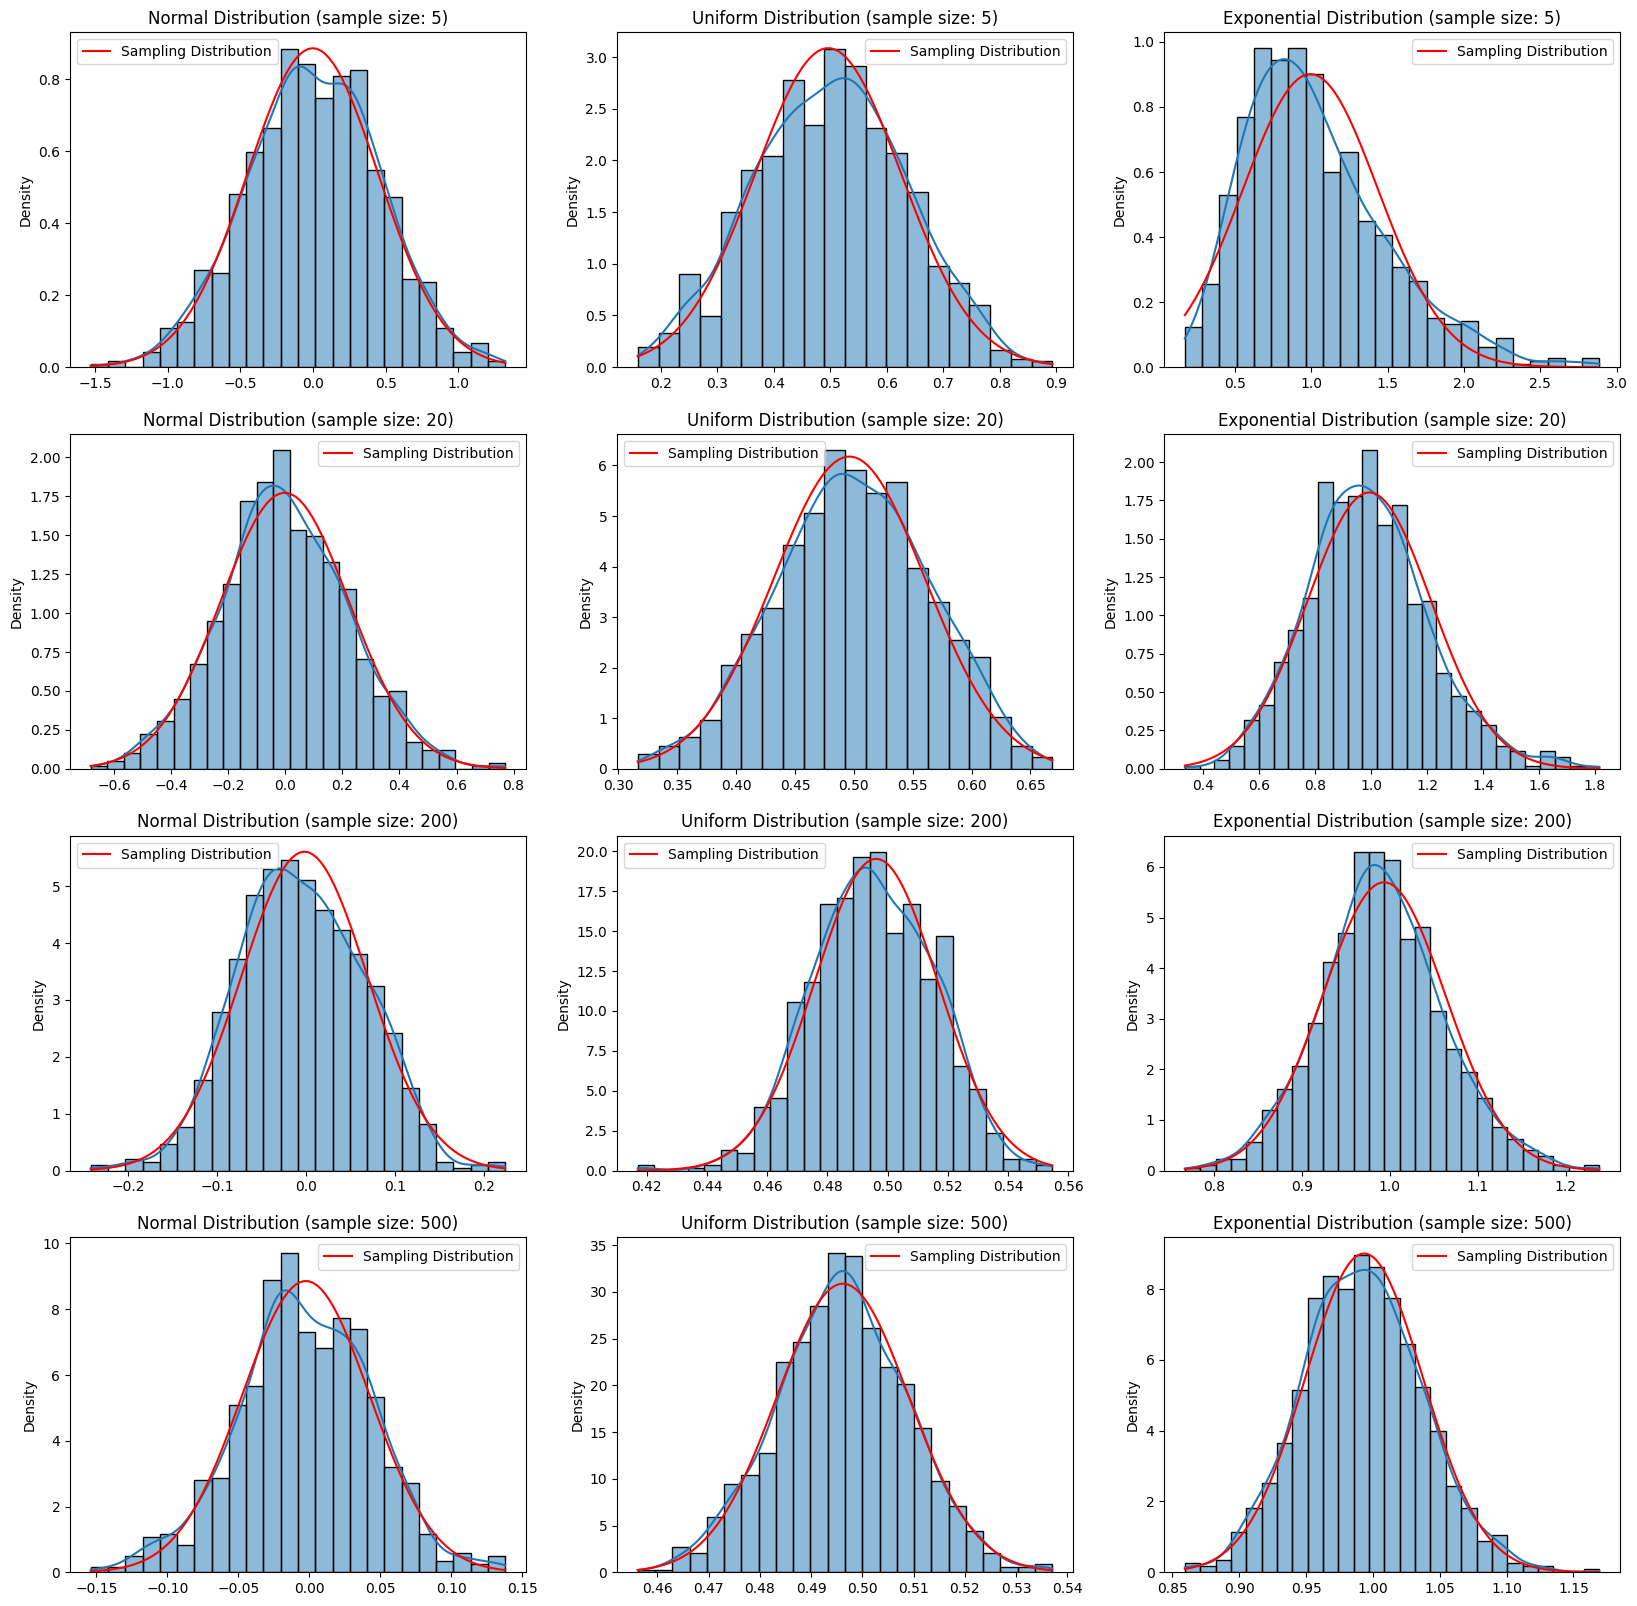

In [109]:
dists_with_samples_stats = run_clt(dists, CLT_SAMPLE_SIZES)

In [132]:
styles = [
    dict(
        selector="th",
        props=[
            ("text-align", "center"),
            ("font-size", "24px"),
            ("background-color", "#2F4F4F"),
            ("color", "#F0F8FF"),        
            ("border-right", "10px solid #000000"),
        ],
    ),
    dict(
        selector="td:not(:first-child)",
        props=[
            ("width", "300px"), 
        ],
    ),
    dict(
        selector="td",
        props=[
            ("text-align", "center"),
            ("font-size", "24px"),
            ("color", "#F0F8FF"),
        ],
    ),
    dict(
        selector="tr:nth-child(odd)",
        props=[
            ("background-color", "#708090"),
        ],
    ),
    dict(
        selector="tr:nth-child(even)",
        props=[
            ("background-color", "#778899"),
        ],
    ),
    dict(
        selector="td:empty",
        props=[
            ("background-color", "#000000"),
        ],
    ),
    dict(
        selector="caption",
        props=[
            ("caption-side", "bottom"),
            ("text-align", "right"),
            ("font-style", "italic"),
            ("font-size", "18px"),
            ("color", "#F0F8FF"),
        ],
    ),
]


def show_results(data: dict[str, dict[str, np.ndarray]]):
    rows = []
    digits = re.compile(r"\d+")
    word = re.compile(r"\w+")
    for size, dists in data.items():
        for name, dist in dists.items():
            size_num = (int(digits.findall(size)[0]) if size != "Population" else "Population")
            first_word = word.findall(name)[0]
            rows.append([size_num, first_word, np.mean(dist), np.std(dist)])
        rows.append(["", "", "", ""])
    df = pd.DataFrame(rows, columns=["Sample Size", "Distribution", "Mean", "Standard Deviation"])
    
    word_or_digit_regex = r'\w|\d'
    mask = df["Sample Size"].astype(str).str.contains(word_or_digit_regex, regex=True)
    df.loc[mask, "Sample Size"] = df.loc[mask, "Sample Size"].shift(len(dists) // 2).fillna(" ")
    df["Sample Size"] = df["Sample Size"].mask(df["Sample Size"].duplicated(keep="first") & df["Sample Size"].ne(""), " ")
    df.index = [""] * len(df)
    styled_df = df.style.set_table_styles(styles)
    display(HTML(styled_df.to_html()))


show_results(dists_with_samples_stats)

,Sample Size,Distribution,Mean,Standard Deviation
,,Normal,-0.002307,1.006788
,Population,Uniform,0.496203,0.288874
,,Exponential,0.993390,0.990171
,,,,
,,Normal,0.003258,0.451643
,5,Uniform,0.500425,0.132982
,,Exponential,1.021829,0.459406
,,,,
,,Normal,-0.004296,0.222040
,20,Uniform,0.499615,0.064696


The Central Limit Theorem has several key observations:
-   The first observation is that the distribution of sample means will be normally distributed regardless of the shape of the population distribution.
-   The second observation is that the mean of the sample means will be approximately equal to the population mean.
-   The third observation is that the standard deviation of the sample means will be approximately equal to the population standard deviation divided by the square root of the sample size.
-   The fourth observation is that the distribution of sample means will become narrower, more symmetric, more bell-shaped, and more normal as the sample size increases.


## Hypothesis Testing

Hypothesis testing is an essential tool in statistics and scientific research that allows us to make informed decisions and come to a conclusion about population parameters based on sample data. In this section, we will understand how hypothesis testing can help us to analyze data and make a decision based on them in different situations.


### Unfair Coin

First, we need to simulate an unfair coin that is biased toward landing on one face more often than the other one. Our task will be to perform a hypothesis testing on this coin to determine whether it is fair or not. We'll use both confidence interval and p-value approach for our test.

Then, we will conduct these tests using different sample sizes: 30, 100, 1000. Then we report and analyze the result of the hypothesis testing for different sample sizes, and calculate z-scores, p-values, the decision made regarding the null hypothesis, and the justification for the decision. Also, we'll discuss the impact of sample size on the hypothesis testing result.


-   $H_0$ (Null Hypothesis): The coin is fair. (p = 0.5)
-   $H_A$ (Alternative Hypothesis): The coin is unfair. (p ≠ 0.5)

Then we will perform a two-tailed test, because we are testing for the possibility of the coin being biased towards either side.


In [22]:
def confidence_interval_test(data: np.ndarray, confidence: float, expected_mean: float):
    confidence_interval = stats.t.interval(confidence, len(data) - 1, loc=np.mean(data), scale=stats.sem(data))
    
    print(Fore.MAGENTA + "* Confidence Interval Test: " + Style.RESET_ALL)
    if confidence_interval[0] <= expected_mean <= confidence_interval[1]:
        print(Fore.GREEN + f"Confidence Interval Test Passed: {confidence_interval[0]:.8f} <= {expected_mean} <= {confidence_interval[1]:.8f}")
        print("So we do not reject the null hypothesis" + Style.RESET_ALL)
    else:
        print(Fore.RED + "Confidence Interval Test Failed:", end=" ")
        if expected_mean < confidence_interval[0]:
            print(f"Expected Mean: {expected_mean} < Confidence Interval Lower Bound: {confidence_interval[0]}")
        else:
            print(f"Expected Mean: {expected_mean} > Confidence Interval Upper Bound: {confidence_interval[1]}")
        print("So we reject the null hypothesis in favor of the alternative hypothesis" + Style.RESET_ALL)


In [23]:
def p_value_test(data: np.ndarray, expected_mean: float, alpha: float):
    t_stat, p_value = stats.ttest_1samp(data, expected_mean)
    
    print(Fore.MAGENTA + "* P Value Test: " + Style.RESET_ALL)
    if p_value >= alpha:
        print(Fore.GREEN + f"P-Value Test Passed: {p_value} >= {alpha}")
        print("So we do not reject the null hypothesis" + Style.RESET_ALL)
    else:
        print(Fore.RED + f"P-Value Test Failed: {p_value} < {alpha}")
        print("So we reject the null hypothesis in favor of the alternative hypothesis" + Style.RESET_ALL)

In [43]:
def calculate_z_score(data: np.ndarray, expected_mean: float):
    return (np.mean(data) - expected_mean) / (np.std(data) / np.sqrt(len(data)))

In [41]:
def run_tests(data: np.ndarray, expected_mean: float, confidence: float, alpha: float):
    print(Fore.CYAN + f"For sample size: {len(data)}" + Style.RESET_ALL)
    print(Fore.CYAN + f"Z-score {calculate_z_score(data, expected_mean)}" + Style.RESET_ALL)
    confidence_interval_test(data, confidence, expected_mean)
    p_value_test(data, expected_mean, alpha)
    print(Fore.YELLOW + "-" * 80 + Style.RESET_ALL)

In [25]:
def generate_sample(sample_size: int, bias: float) -> np.ndarray:
    """
    Generate a sample of coin flips with a biased coin.
    """
    flips = np.random.choice([0, 1], size=sample_size, p=[bias, 1 - bias])
    return flips

At first we try with 10% bias, then we will try with 20% bias.

In [45]:
for bias in UNFAIR_COIN_BIAS:
    print(f"Biased Coin with Bias: {bias}")
    for sample_size in COIN_SAMPLE_SIZES:
        sample = generate_sample(sample_size, bias)
        run_tests(sample, FAIR_COIN_MEAN, CONFIDENCE_LEVEL, ALPHA)
    print()

Biased Coin with Bias: 0.55
For sample size: 30
Z-score -1.936491673103709
* Confidence Interval Test: 
Confidence Interval Test Passed: 0.15429879 <= 0.5 <= 0.51236787
So we do not reject the null hypothesis
* P Value Test: 
P-Value Test Passed: 0.06688289079467748 >= 0.05
So we do not reject the null hypothesis
--------------------------------------------------------------------------------
For sample size: 100
Z-score 0.20004001200400157
* Confidence Interval Test: 
Confidence Interval Test Passed: 0.41030929 <= 0.5 <= 0.60969071
So we do not reject the null hypothesis
* P Value Test: 
P-Value Test Passed: 0.8426417731724416 >= 0.05
So we do not reject the null hypothesis
--------------------------------------------------------------------------------
For sample size: 1000
Z-score -2.8576468957561354
* Confidence Interval Test: 
Confidence Interval Test Failed: Expected Mean: 0.5 > Confidence Interval Upper Bound: 0.4859168888945725
So we reject the null hypothesis in favor of the a

The sample size plays a crucial role in hypothesis testing. As the sample size increases, the standard error (the standard deviation of the sample mean) decreases. This means that the sample mean becomes a more accurate estimate of the population mean.  
As the sample size increases from 30 to 10000, the Z-score becomes more negative, indicating that the sample mean is getting further from the hypothesized population mean. This leads to a smaller p-value and a narrower confidence interval, increasing the likelihood of rejecting the null hypothesis.  
Increasing the sample size increases the power of a hypothesis test, which is the probability of correctly rejecting the null hypothesis when it is false. This means that with a larger sample size, we are more likely to detect a difference or effect if one truly exists.

### T-Test

A t-test is a statistical test used to determine if there is a significant difference between the means of two groups or samples. In this test, we first calculate the t-statistic for the two groups or samples and then calculate the probability of having this **t-statistic** using the **t-distribution**. In the end, we only need to compare the p-value with our significance level($\alpha$) and make our decision. You can learn more about t-test, t-statistics, degrees of freedom, and student’s t-distribution in [this link](https://youtu.be/_L7uHhDY5AQ?si=iqg8NfRV9rMyYTD-).


**Job Placement**

There is a common belief that working alongside studying has a negative impact on their grades. We are given a job placement dataset that contains information about students studying in USA various universities alongside their job status. We'll perform a hypothesis test to test whether this belief is true or not. In out test, we will suppose that variance is unknown but equal for both of these groups.

We will follow the below steps:

1. First we split students into two groups based on their job placement status.


In [3]:
df = pd.read_csv(JOB_PLACEMENT_CSV)
df.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


In [4]:
df_placed = df[df["placement_status"] == "Placed"]
df_not_placed = df[df["placement_status"] == "Not Placed"]

1. Then we calculate the t-statistic and degrees of freedom for these two groups. At first we do not use any library for implementing this part. Then we use the `scipy.stats` library to calculate the t-statistic and p-value for our test and then compare the results.

The formulas needed for the t-statistic and degrees of freedom are as follows:

* The formula for the t-statistic in a two-sample t-test is:

$$ t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

where:
- $\bar{X}_1$ and $\bar{X}_2$ are the sample means,
- $s_1^2$ and $s_2^2$ are the sample variances,
- $n_1$ and $n_2$ are the sample sizes.

* The degrees of freedom for a two-sample t-test is:

$$ df = n_1 + n_2 - 2 $$

where $n_1$ and $n_2$ are the sample sizes.

Here is how you can calculate these in Python:

After calculating these values, we can use them to find the p-value and make your decision. If the p-value is less than your significance level ($\alpha$), we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis. The null hypothesis in this case is that there is no difference in grades between students who are placed and those who are not placed. If we reject the null hypothesis, it suggests that job placement status has an impact on grades. If we fail to reject the null hypothesis, it suggests that job placement status does not have a significant impact on grades. 

-   $H_0$ (Null Hypothesis): There is no difference in grades between students who are placed and those who are not placed.
-   $H_A$ (Alternative Hypothesis): There is a difference in grades between students who are placed and those who are not placed.


In [18]:
def print_stats(df: pd.DataFrame, title: str) -> tuple[float, float, int]: 
    print(Fore.CYAN + f"{title}" + Style.RESET_ALL)
    print(f"Mean: {df['gpa'].mean():.8f}")
    print(f"Standard Deviation: {df['gpa'].std():.8f}")
    print(f"Variance: {df['gpa'].var():.8f}")
    print(f"Count: {len(df)}")
    print(Fore.YELLOW + "-" * 80 + Style.RESET_ALL)
    return df["gpa"].mean(), df["gpa"].var(), len(df)

mean_placed, var_placed, n_placed = print_stats(df_placed, "Placed")
mean_not_placed, var_not_placed, n_not_placed = print_stats(df_not_placed, "Not Placed")

Placed
Mean: 3.76140351
Standard Deviation: 0.11335185
Variance: 0.01284864
Count: 570
--------------------------------------------------------------------------------
Not Placed
Mean: 3.70230769
Standard Deviation: 0.14167622
Variance: 0.02007215
Count: 130
--------------------------------------------------------------------------------


In [19]:
t_statistic = (mean_placed - mean_not_placed) / np.sqrt((var_placed / n_placed) + (var_not_placed / n_not_placed))
degrees_of_freedom = n_placed + n_not_placed - 2 # -2 because we are estimating the mean of two populations

3. Now, we determine the p-value for the calculated t-statistic and degrees of freedom with the help of t-distribution. You can use the SciPy library for this purpose.


In [20]:
# alternative for this line is p_value = stats.t.sf(t_statistic, df=degrees_of_freedom) * 2
p_value = (1 - stats.t.cdf(t_statistic, df=degrees_of_freedom)) * 2 # two-tailed test
print(p_value)

1.0331157920040468e-05


4. Finally, we report the result of our test and make a decision.


In [21]:
def report_t_test_results(t_statistic: float, degrees_of_freedom: int, p_value: float): 
    print(f"t-statistic: {t_statistic}, degrees of freedom: {degrees_of_freedom}, p-value: {p_value}")

    if p_value < ALPHA:
        print("We reject the null hypothesis in favor of the alternative hypothesis")
    else:
        print("We do not reject the null hypothesis")

In [13]:
report_t_test_results(t_statistic, degrees_of_freedom, p_value)

t-statistic: 4.44263334755554, degrees of freedom: 698, p-value: 1.0331157920040468e-05
We reject the null hypothesis in favor of the alternative hypothesis


5. Now we repeat this test one more time. This time, only using the SciPy library for performing the test. Then we compare the results of the tests with each other.


In [22]:
t_statistic, p_value = stats.ttest_ind(df_placed["gpa"], df_not_placed["gpa"], equal_var=False)
report_t_test_results(t_statistic, degrees_of_freedom, p_value)

t-statistic: 4.44263334755554, degrees of freedom: 698, p-value: 1.603845886004092e-05
We reject the null hypothesis in favor of the alternative hypothesis


As can be seen results are the same and both of show same results. In both cases, we reject the null hypothesis and conclude that job placement status has an impact on grades, and since the p-value is considerably less than the significance level, we can say that the result is statistically significant, and that job placement status does have a significant impact on grades.

## Questions

1. **Read a little bit about the applications of Monte Carlo Simulation in real life. What are some of these applications?**
   
    Some of the applications are:

   1. **Manufacturing**: Monte Carlo Simulation can be used to predict the daily output of a manufacturing unit. It helps in understanding the uncertainties in manufacturing processes, such as the quality of raw materials.
   2. **Finance and Business**: Monte Carlo Simulation is used to simulate profits or losses in the online trading of stocks. It can also be used to value projects that require significant amounts of funds and may have future financial implications on a company.
   3. **Pension Benefit Schemes**: Monte Carlo Simulation can simulate the values of assets and liabilities of a pension benefit scheme.
   4. **Project Management**: Monte Carlo Simulation can be used in project management to assess the impact of risk and uncertainty in project schedules and costs.
   5. **Sales Forecasting**: Monte Carlo Simulation can help in predicting future sales data based on certain variables, helping businesses plan their strategies.
   6. **Artificial Intelligence**: Monte Carlo Simulation is used in artificial intelligence for making decisions under uncertainty.
   7. **Risk Assessment**: A researcher performing a risk assessment of potential toxic chemicals in South Korean cabbage kimchi used Monte Carlo Simulation.
   8. **Telecom Service Providers**: Monte Carlo Simulation can gauge the ability of a network to handle swells in viewer traffic during events like the Olympics.


2. **How does the sample size affect your plots in part 2 (CLT)? What can you understand from these plots?**

    Increasing the sample size will make the distribution of sample means narrower, more symmetric, more bell-shaped, and more normal. This is because the standard deviation of the sample means will be approximately equal to the population standard deviation divided by the square root of the sample size. As the sample size increases, the standard deviation of the sample means will decrease, and the distribution of sample means will become narrower, more symmetric, more bell-shaped, and more normal.

    As already mentioned, the distribution of sample means will be normally distributed regardless of the shape of the population distribution. This is because the sampling distribution of the sample means can be calculated using the formula: $Sampling\ Distribution \sim N(\mu, \frac{\sigma}{\sqrt{n}})$.

    The mean of the sampling distribution will be approximately equal to the population mean.

3. **How does increasing the sample size affect your coin test?**

    By increasing the sample size, the standard error (the standard deviation of the sample mean) decreases. This means that the sample mean becomes a more accurate estimate of the population mean. As the sample size increases, the Z-score becomes more negative, indicating that the sample mean is getting further from the hypothesized population mean. This leads to a smaller p-value and a narrower confidence interval, increasing the likelihood of rejecting the null hypothesis. Increasing the sample size increases the power of a hypothesis test, which is the probability of correctly rejecting the null hypothesis when it is false. This means that with a larger sample size, we are more likely to detect a difference or effect if one truly exists.

4. **What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they help us to compare two data sets?**

    t-statistic is a measure of the difference between the sample mean and the hypothesized population mean in terms of the standard error. It is calculated using the formula: $t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$, where $\bar{x}$ is the sample mean, $\mu$ is the hypothesized population mean, $s$ is the sample standard deviation, and $n$ is the sample size.  
    degrees of freedom is the number of independent pieces of information that go into the estimate of a parameter. It is calculated using the formula: $df = n - 1$, where $n$ is the sample size.
    t-distribution is a probability distribution that is used to estimate the population mean when the sample size is small and/or the population standard deviation is unknown. It is similar to the standard normal distribution, but it has heavier tails. It is used to calculate the p-value for the t-statistic.


5. **What are the preliminary conditions for using t-test on our data?**

    The preliminary conditions for using t-test on our data are:

    1. The data should be approximately normally distributed.
    2. The variances of the two groups should be approximately equal.
    3. The data should be independent and identically distributed (i.i.d.).
    4. The sample size should be large enough to ensure that the sampling distribution of the sample means is approximately normally distributed.

6. **Read about some other types of tests that are used in scientific research. Write a line about each of them.**

    1. **Chi-Square Test**: A statistical test used to determine whether there is a significant association between two categorical variables.
    2. **ANOVA (Analysis of Variance)**: A statistical test used to determine whether there are any statistically significant differences between the means of three or more independent groups.
    3. **Mann-Whitney U Test**: A nonparametric test used to determine whether there is a significant difference between the medians of two independent groups.
    4. **Wilcoxon Signed-Rank Test**: A nonparametric test used to determine whether there is a significant difference between the medians of two related groups.
    5. **Kruskal-Wallis Test**: A nonparametric test used to determine whether there are any statistically significant differences between the medians of three or more independent groups.
    6. **Fisher's Exact Test**: A statistical test used to determine whether there are nonrandom associations between two categorical variables.

## Resources

*   [Monte Carlo Simulation](https://en.wikipedia.org/wiki/Monte_Carlo_method)
*   [Monte Carlo Simulation](https://aws.amazon.com/what-is/monte-carlo-simulation/)
*   [Monte Carlo Simulation Advanced](https://towardsdatascience.com/monte-carlo-methods-and-simulations-explained-in-real-life-modeling-insomnia-f49685b321d0)
*   [Monte Carlo Simulation in Real Life](https://www.investopedia.com/terms/m/montecarlosimulation.asp)
*   [Monte Carlo Examples](https://machinelearningknowledge.ai/examples-of-monte-carlo-simulation-in-python/)
*   [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)
*   [Central Limit Theorem](https://www.investopedia.com/terms/c/central_limit_theorem.asp)
*   [Central Limit Theorem Applications](https://www.statisticshowto.com/central-limit-theorem-definition-examples/)
*   [Hypothesis Testing](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)
*   [Hypothesis Testing Methods](https://www.investopedia.com/terms/h/hypothesistesting.asp)
*   [T-Test](https://en.wikipedia.org/wiki/Student%27s_t-test)
*   [T-Distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)
*   [T-Statistic](https://en.wikipedia.org/wiki/T-statistic)